# Bitcoin Data Analysis

## Read Data & Perform Basic Descriptive Analysis

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the file
df = pd.read_csv(r'D:\Dokumen\Portfolio Project\Bitcoin\Dataset/bitcoin_price_Training - Training.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
df.shape

(1556, 7)

In [8]:
df.info()
# date is still object data type, must convert it to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
#transpose the data to make it more readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


## Doing Data Pre-processing

In [11]:
#check the datatype of each column
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [14]:
#change type of date to datetime
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [15]:
#check the oldest date
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [16]:
#check the recent date
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [17]:
#check missing values
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [18]:
#check duplicate values
df.duplicated().sum()

0

In [21]:
df.head(3)
#the latest data is 31 July 2017

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [22]:
df.tail(3)
#the oldest data is 28 April 2013

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [24]:
#sort the data from oldest to recent
df.sort_index(ascending = False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


Insight:  
- the latest data is 31 July 2017
- the oldest data is 28 April 2013

## Analyzing Change in Price of The Bitcoin Overtime

In [27]:
#reset index for oldest to recent data
data = df.sort_index(ascending = False).reset_index()
data.head(3)

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [30]:
#drop the index
data.drop(labels='index', axis=1, inplace=True)
data.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

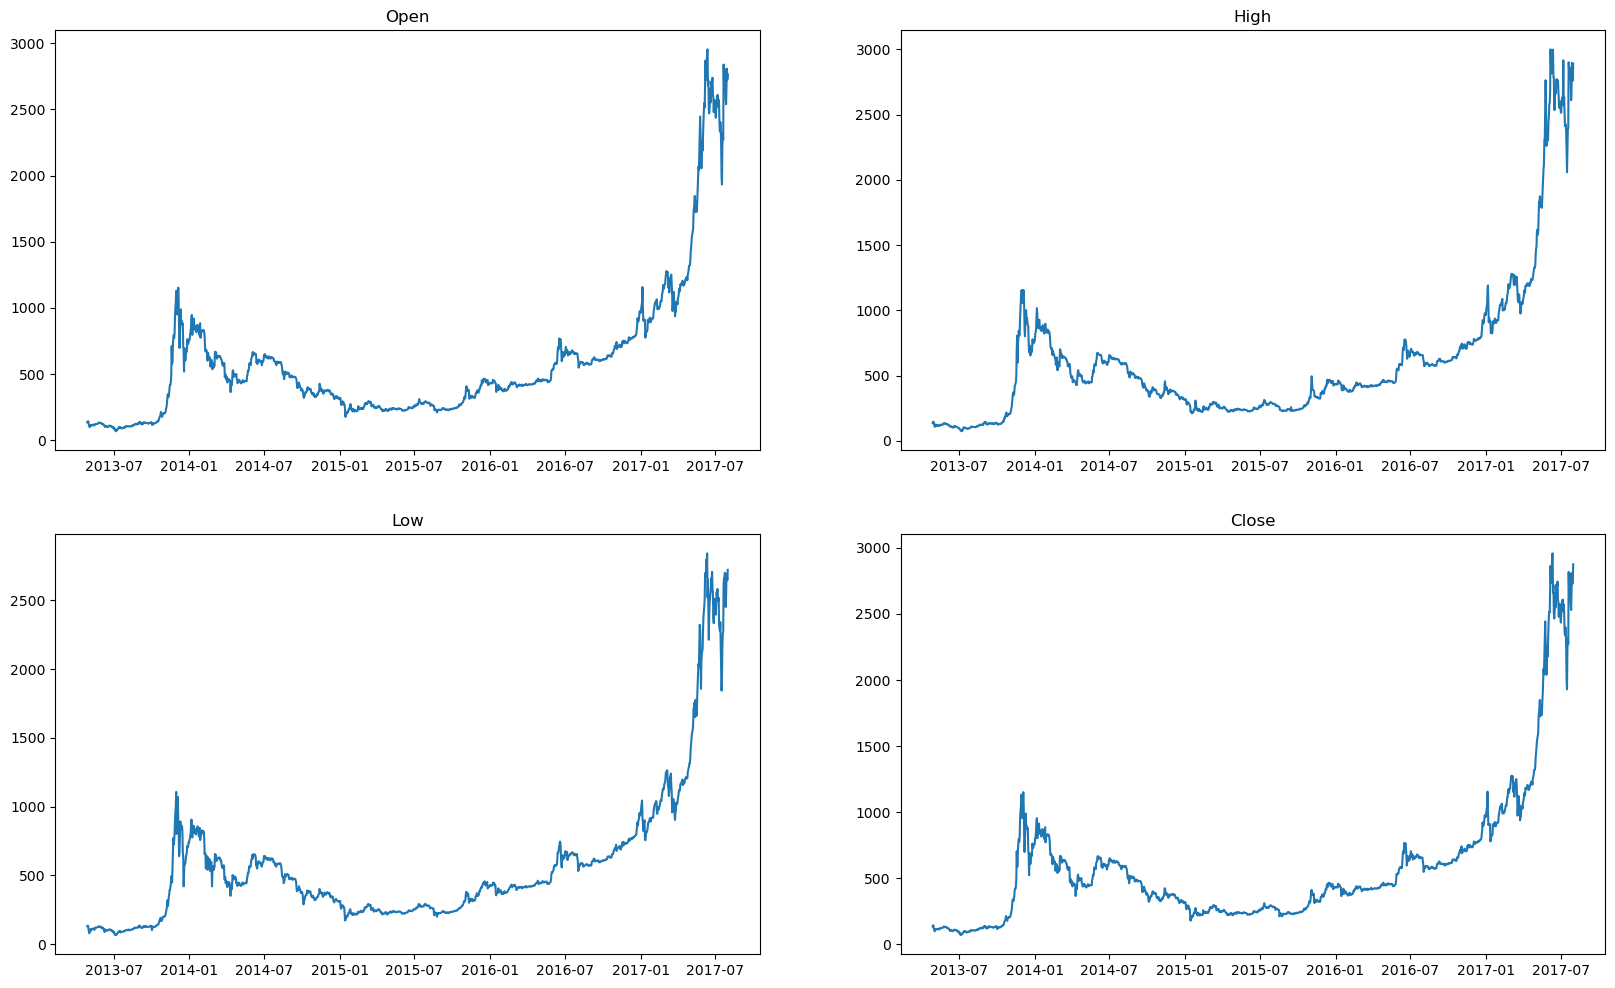

In [32]:
#plot for Open, High, Low, Close price
plt.figure(figsize=(20,12))

for index, col in enumerate(['Open','High','Low','Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

Insight:  
For each price for Open, High, Low, and Close, there are spike in 2014 and 2017

## Analyzing Bitcoin Price Using Candle-Stick Chart

In [33]:
#pick sampe data
bitcoin_sample = data[0:50]

In [34]:
#setup for plotly package
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [35]:
#create candle stick data
trace = go.Candlestick(x= bitcoin_sample['Date'],
                       high = bitcoin_sample['High'],
                       open = bitcoin_sample['Open'],
                       close = bitcoin_sample['Close'],
                       low = bitcoin_sample['Low'])

In [36]:
candle_data=[trace]

In [43]:
#plot the candle stick
candle_data=[trace]
layout = {'title':'Bitcoin Historical Price',
         'xaxis':{'title':'Date'}}
fig = go.Figure(data= candle_data ,layout=layout)
fig.show()

## Analyzing Closing Price in depth

In [51]:
#update dataframe to set date as index
data.set_index('Date', inplace = True)
data.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


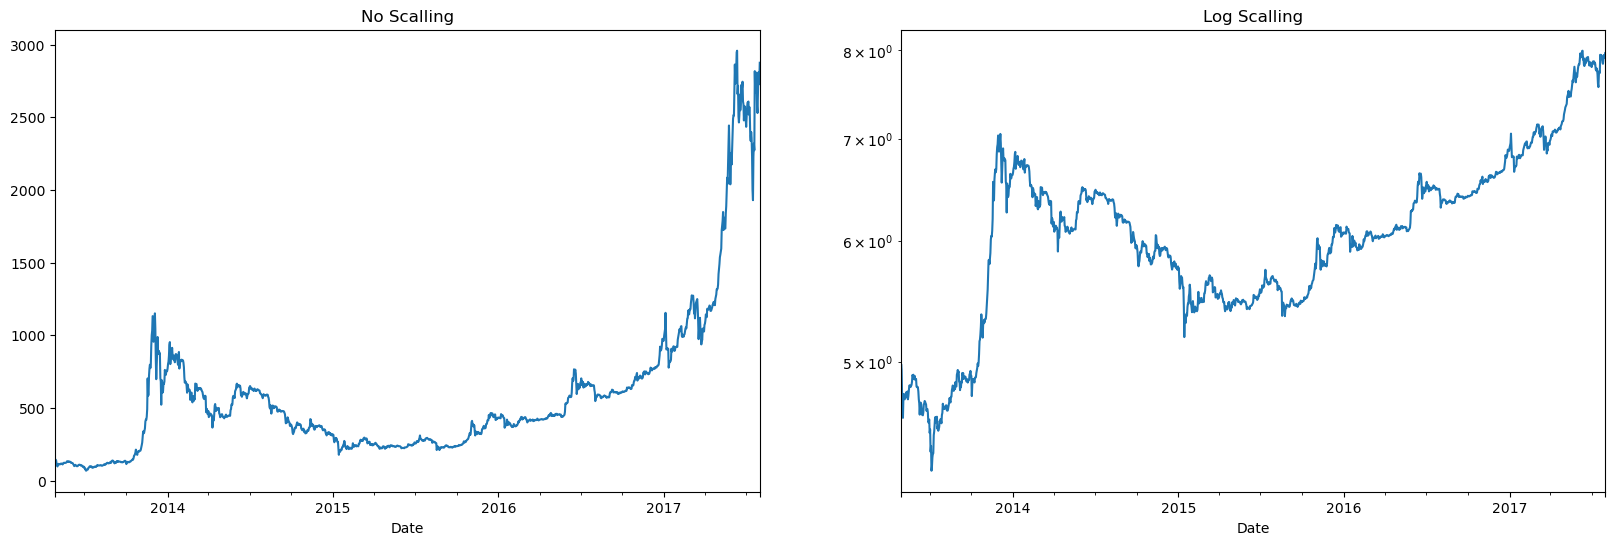

In [56]:
plt.figure(figsize=(20,6))
#plot the linear scale for close price
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scalling')

#plot the log scale for close price
plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scalling')
plt.yscale('log')

Insight:
- Logarithmic price scale are better than linear scale for showing less severe price increases or decreases
- There is an upward trend in 2014 and 2017 for each graph
- There is no seasonality in data

## Perform Analysis on Closing Price on Yearly, Quarterly, and Monthly Basis

In [57]:
#check if date is the index
data.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [58]:
#resample average close price on yearly
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

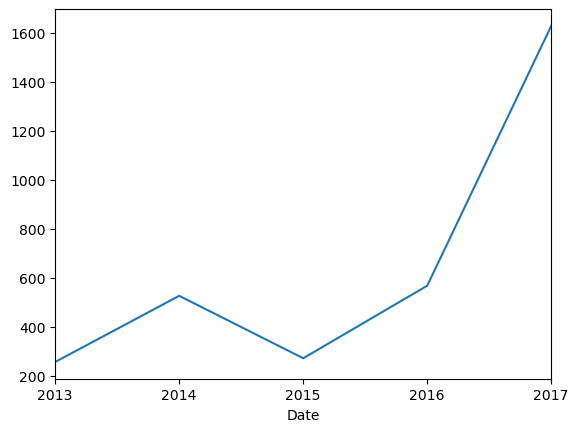

In [59]:
# plot resample average close price on yearly
data['Close'].resample('Y').mean().plot()

In [64]:
#resample average close price on monthly
data['Close'].resample('M').mean().head(5)

Date
2013-04-30    139.250000
2013-05-31    119.993226
2013-06-30    107.761333
2013-07-31     90.512258
2013-08-31    113.905161
Freq: M, Name: Close, dtype: float64

<Axes: xlabel='Date'>

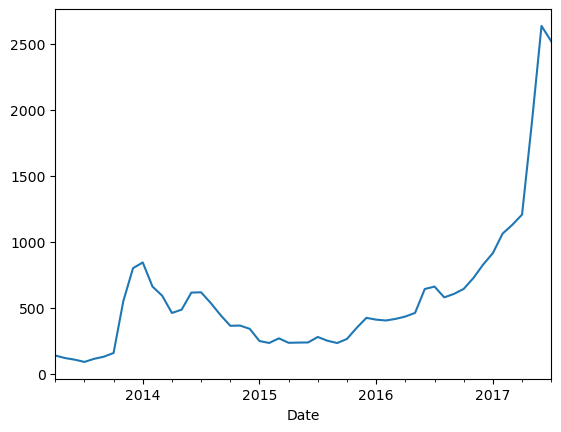

In [62]:
#plot resample average close price on monthly
data['Close'].resample('M').mean().plot()

In [65]:
#resample average close price on quarterly
data['Close'].resample('Q').mean().head(5)

Date
2013-06-30    115.162188
2013-09-30    111.291196
2013-12-31    502.657609
2014-03-31    700.586000
2014-06-30    520.929341
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

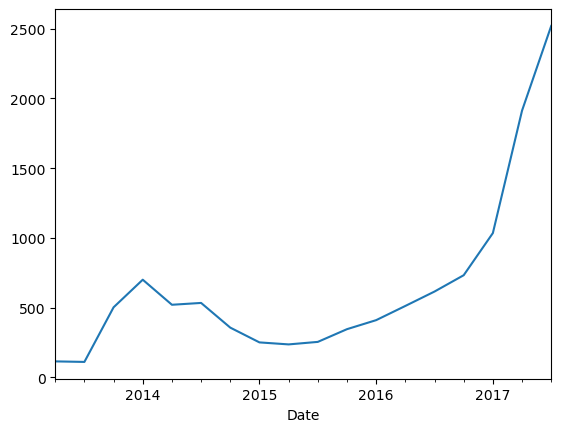

In [66]:
#plot resample average close price on quarterly
data['Close'].resample('Q').mean().plot()

## Analyzing Daily Change In Closing Price of Bitcoin

In [69]:
#access close daily price
data['Close'].head(5)

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [68]:
#daily change in percentage
data['Close_price_pct_change'] = data['Close'].pct_change()*100
data['Close_price_pct_change'].head(5)

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
Name: Close_price_pct_change, dtype: float64

Insight :
- On 28 April 2013, close price = 134.21
- On 29 April 2013, close price = 144.54
- From 28 April 2013 to 29 April 2013, we'll observe there is 7.7% change

In [72]:
#setup cufflinks
import cufflinks as cf
cf.go_offline()

C:\Users\nurahman\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [74]:
#plot daily change
data['Close_price_pct_change'].iplot()

Insight:
- On 18 November 2013 there is spike on closing price with the change 42.96%
- On 19 December 2013 there is spike on closing price with the change 32.38%
- On 20 July 2017 there is spike on closing price with the change 23.94%